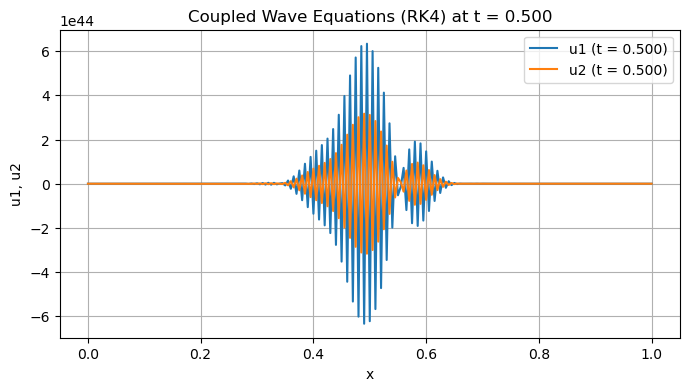

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def derivatives(u1, v1, u2, v2, dx, c1, c2):
    """
    计算在当前时刻(u1, v1, u2, v2)下，各函数对t的一阶导数。
    其中:
      u1, v1, u2, v2 为长度相同的数组(离散网格上的值)。
      dx 为空间步长, c1, c2 为常数。
    返回: (du1dt, dv1dt, du2dt, dv2dt) 这四个数组。
    """
    Nx = len(u1)
    
    # du1/dt = v1, du2/dt = v2
    du1dt = v1
    du2dt = v2
    
    # dv1/dt = c1^2 * d^2(u2)/dx^2
    # dv2/dt = c2^2 * d^2(u1)/dx^2
    dv1dt = np.zeros_like(u1)
    dv2dt = np.zeros_like(u2)
    
    # 用中心差分计算二阶空间导数
    for i in range(1, Nx-1):
        d2u2dx2 = (u2[i+1] - 2*u2[i] + u2[i-1]) / (dx*dx)
        dv1dt[i] = c1**2 * d2u2dx2
        
        d2u1dx2 = (u1[i+1] - 2*u1[i] + u1[i-1]) / (dx*dx)
        dv2dt[i] = c2**2 * d2u1dx2
    
    return du1dt, dv1dt, du2dt, dv2dt

def rk4_step(u1, v1, u2, v2, dt, dx, c1, c2):
    """
    对 (u1, v1, u2, v2) 做一次 RK4 时间推进。
    返回更新后的 (u1_new, v1_new, u2_new, v2_new)。
    """
    # k1
    k1_u1, k1_v1, k1_u2, k1_v2 = derivatives(u1, v1, u2, v2, dx, c1, c2)
    
    # k2
    u1_1 = u1 + k1_u1 * (dt/2)
    v1_1 = v1 + k1_v1 * (dt/2)
    u2_1 = u2 + k1_u2 * (dt/2)
    v2_1 = v2 + k1_v2 * (dt/2)
    k2_u1, k2_v1, k2_u2, k2_v2 = derivatives(u1_1, v1_1, u2_1, v2_1, dx, c1, c2)
    
    # k3
    u1_2 = u1 + k2_u1 * (dt/2)
    v1_2 = v1 + k2_v1 * (dt/2)
    u2_2 = u2 + k2_u2 * (dt/2)
    v2_2 = v2 + k2_v2 * (dt/2)
    k3_u1, k3_v1, k3_u2, k3_v2 = derivatives(u1_2, v1_2, u2_2, v2_2, dx, c1, c2)
    
    # k4
    u1_3 = u1 + k3_u1 * dt
    v1_3 = v1 + k3_v1 * dt
    u2_3 = u2 + k3_u2 * dt
    v2_3 = v2 + k3_v2 * dt
    k4_u1, k4_v1, k4_u2, k4_v2 = derivatives(u1_3, v1_3, u2_3, v2_3, dx, c1, c2)
    
    # 组合更新 (RK4)
    u1_new = u1 + (dt/6) * (k1_u1 + 2*k2_u1 + 2*k3_u1 + k4_u1)
    v1_new = v1 + (dt/6) * (k1_v1 + 2*k2_v1 + 2*k3_v1 + k4_v1)
    u2_new = u2 + (dt/6) * (k1_u2 + 2*k2_u2 + 2*k3_u2 + k4_u2)
    v2_new = v2 + (dt/6) * (k1_v2 + 2*k2_v2 + 2*k3_v2 + k4_v2)
    
    return u1_new, v1_new, u2_new, v2_new

def solve_coupled_wave_1D(Nx=101, L=1.0, c1=1.0, c2=1.0, dt=1e-3, T=0.2):
    """
    用RK4在一维空间[0,L]上模拟耦合波动方程组:
        d^2 u1/dt^2 = c1^2 * d^2 u2/dx^2
        d^2 u2/dt^2 = c2^2 * d^2 u1/dx^2
    参数：
      Nx  : 空间网格数
      L   : 空间长度
      c1, c2 : 方程中的常数
      dt  : 时间步长
      T   : 模拟总时间
    返回：
      x   : 空间坐标网格
      (u1, v1, u2, v2) : 在模拟结束时各函数/速度的分布(数组)
    """
    # 空间网格
    x = np.linspace(0, L, Nx)
    dx = x[1] - x[0]
    
    # 初始化 u1, v1, u2, v2
    # 这里给 u1 一个简单的高斯脉冲，其他初始为 0
    u1 = np.exp(-200*(x - 0.5*L)**2)  # 高斯脉冲
    v1 = np.zeros_like(x)
    u2 = np.zeros_like(x)
    v2 = np.zeros_like(x)
    
    # 时间步数
    steps = int(T / dt)
    
    for n in range(steps):
        # 一步 RK4
        u1, v1, u2, v2 = rk4_step(u1, v1, u2, v2, dt, dx, c1, c2)
        
        # 处理边界条件 (此处简单做Dirichlet边界：u=0, v=0)
        # 或者可改成 Neumann / 周期性 边界等
        u1[0], u1[-1] = 0.0, 0.0
        u2[0], u2[-1] = 0.0, 0.0
        v1[0], v1[-1] = 0.0, 0.0
        v2[0], v2[-1] = 0.0, 0.0
    
    return x, u1, v1, u2, v2

# ========== 主程序调用示例 ==========

if __name__ == "__main__":
    # 参数设置
    Nx   = 201   # 空间网格数越多，精度越高
    L    = 1.0   # 空间区间 [0, L]
    c1   = 1.0
    c2   = 0.5
    dt   = 1e-4  # 时间步长
    T    = 0.5   # 总模拟时间
    
    # 求解
    x, u1_end, v1_end, u2_end, v2_end = solve_coupled_wave_1D(Nx, L, c1, c2, dt, T)
    
    # 简单绘图
    plt.figure(figsize=(8,4))
    plt.plot(x, u1_end, label="u1 (t = %.3f)" % T)
    plt.plot(x, u2_end, label="u2 (t = %.3f)" % T)
    plt.xlabel("x")
    plt.ylabel("u1, u2")
    plt.title("Coupled Wave Equations (RK4) at t = %.3f" % T)
    plt.legend()
    plt.grid(True)
    plt.show()


dx = 5.0000e-03, dt_cfl = 5.6569e-03, steps = 88


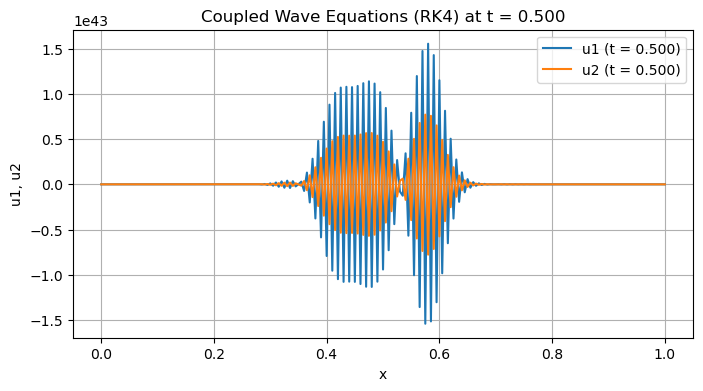

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def derivatives(u1, v1, u2, v2, dx, c1, c2):
    """
    计算在当前时刻(u1, v1, u2, v2)下，各函数对t的一阶导数:
      du1/dt, dv1/dt, du2/dt, dv2/dt.
    其中:
      u1, v1, u2, v2 : 各为长度 Nx 的数组(离散网格上的值)。
      dx  : 空间步长
      c1, c2 : 波速系数
    返回: (du1dt, dv1dt, du2dt, dv2dt) 这四个数组。
    """
    Nx = len(u1)
    
    # du1/dt = v1, du2/dt = v2
    du1dt = v1
    du2dt = v2
    
    # dv1/dt = c1^2 * d^2(u2)/dx^2
    # dv2/dt = c2^2 * d^2(u1)/dx^2
    dv1dt = np.zeros_like(u1)
    dv2dt = np.zeros_like(u2)
    
    # 用中心差分计算二阶空间导数 (忽略边界, 边界后面单独赋值)
    for i in range(1, Nx-1):
        d2u2_dx2 = (u2[i+1] - 2*u2[i] + u2[i-1]) / (dx*dx)
        dv1dt[i] = c1**2 * d2u2_dx2
        
        d2u1_dx2 = (u1[i+1] - 2*u1[i] + u1[i-1]) / (dx*dx)
        dv2dt[i] = c2**2 * d2u1_dx2
    
    return du1dt, dv1dt, du2dt, dv2dt


def rk4_step(u1, v1, u2, v2, dt, dx, c1, c2):
    """
    对 (u1, v1, u2, v2) 做一次 RK4 时间推进。
    返回更新后的 (u1_new, v1_new, u2_new, v2_new)。
    """
    # k1
    k1_u1, k1_v1, k1_u2, k1_v2 = derivatives(u1, v1, u2, v2, dx, c1, c2)
    
    # k2
    u1_1 = u1 + k1_u1 * (dt/2)
    v1_1 = v1 + k1_v1 * (dt/2)
    u2_1 = u2 + k1_u2 * (dt/2)
    v2_1 = v2 + k1_v2 * (dt/2)
    k2_u1, k2_v1, k2_u2, k2_v2 = derivatives(u1_1, v1_1, u2_1, v2_1, dx, c1, c2)
    
    # k3
    u1_2 = u1 + k2_u1 * (dt/2)
    v1_2 = v1 + k2_v1 * (dt/2)
    u2_2 = u2 + k2_u2 * (dt/2)
    v2_2 = v2 + k2_v2 * (dt/2)
    k3_u1, k3_v1, k3_u2, k3_v2 = derivatives(u1_2, v1_2, u2_2, v2_2, dx, c1, c2)
    
    # k4
    u1_3 = u1 + k3_u1 * dt
    v1_3 = v1 + k3_v1 * dt
    u2_3 = u2 + k3_u2 * dt
    v2_3 = v2 + k3_v2 * dt
    k4_u1, k4_v1, k4_u2, k4_v2 = derivatives(u1_3, v1_3, u2_3, v2_3, dx, c1, c2)
    
    # 合并
    u1_new = u1 + (dt/6) * (k1_u1 + 2*k2_u1 + 2*k3_u1 + k4_u1)
    v1_new = v1 + (dt/6) * (k1_v1 + 2*k2_v1 + 2*k3_v1 + k4_v1)
    u2_new = u2 + (dt/6) * (k1_u2 + 2*k2_u2 + 2*k3_u2 + k4_u2)
    v2_new = v2 + (dt/6) * (k1_v2 + 2*k2_v2 + 2*k3_v2 + k4_v2)
    
    return u1_new, v1_new, u2_new, v2_new


def solve_coupled_wave_1D(Nx=201, L=1.0, c1=1.0, c2=0.5, CFL_factor=0.8, T=0.5):
    """
    用RK4在一维空间[0,L]上模拟耦合波动方程:
        d^2 u1/dt^2 = c1^2 * d^2 u2/dx^2
        d^2 u2/dt^2 = c2^2 * d^2 u1/dx^2.
    参数：
      Nx        : 空间网格数
      L         : 空间长度
      c1, c2    : 系数
      CFL_factor: 用于安全的CFL系数(通常<1)
      T         : 总模拟时间
    返回：
      x   : 空间坐标网格
      (u1, v1, u2, v2) : 在模拟结束时的数值解(数组)
    """
    # 1. 建立空间网格
    x = np.linspace(0, L, Nx)
    dx = x[1] - x[0]
    
    # 2. 根据 CFL 条件自动计算安全 dt
    #    对该耦合系统，"特征传播速度"可近似取 v = sqrt(c1*c2).
    v_eff = np.sqrt(c1 * c2)
    dt_cfl = CFL_factor * dx / v_eff
    # 若 T 很小或很大，都可以先看看dt_cfl的量级 
    # 不过这里我们直接使用 dt_cfl
    dt = dt_cfl
    print(f"dx = {dx:.4e}, dt_cfl = {dt:.4e}, steps = {int(T/dt)}")
    
    # 3. 初始化 u1, v1, u2, v2
    #    这里给 u1 一个简单的高斯脉冲，u2=0, 初速度也全是0
    u1 = np.exp(-200*(x - 0.5*L)**2)
    v1 = np.zeros_like(x)
    u2 = np.zeros_like(x)
    v2 = np.zeros_like(x)
    
    # 4. 时间推进
    steps = int(T / dt)   # 总步数
    for n in range(steps):
        # 做一步 RK4
        u1, v1, u2, v2 = rk4_step(u1, v1, u2, v2, dt, dx, c1, c2)
        
        # 边界条件(Dirichlet): u1 = 0, u2 = 0, 对应的v1,v2也=0
        u1[0], u1[-1] = 0.0, 0.0
        u2[0], u2[-1] = 0.0, 0.0
        v1[0], v1[-1] = 0.0, 0.0
        v2[0], v2[-1] = 0.0, 0.0
    
    return x, u1, v1, u2, v2


if __name__ == "__main__":
    # 设置参数
    Nx   = 201
    L    = 1.0
    c1   = 1.0
    c2   = 0.5
    CFL_factor = 0.8
    T    = 0.5  # 模拟到 t=0.5
    
    # 调用求解
    x, u1_end, v1_end, u2_end, v2_end = solve_coupled_wave_1D(
        Nx=Nx, L=L, c1=c1, c2=c2, CFL_factor=CFL_factor, T=T
    )
    
    # 绘图观察
    plt.figure(figsize=(8,4))
    plt.plot(x, u1_end, label=f"u1 (t = {T:.3f})")
    plt.plot(x, u2_end, label=f"u2 (t = {T:.3f})")
    plt.xlabel("x")
    plt.ylabel("u1, u2")
    plt.title(f"Coupled Wave Equations (RK4) at t = {T:.3f}")
    plt.legend()
    plt.grid(True)
    plt.show()


two_step_coupled_wave: dx=5.000e-03, dt=5.657e-03, steps=88


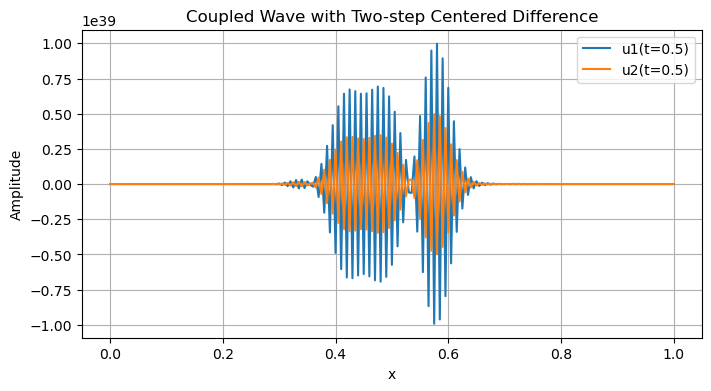

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def two_step_coupled_wave(Nx=201, L=1.0, c1=1.0, c2=0.5, CFL_factor=0.8, T=0.5):
    """
    使用两步中心差分(Leapfrog)显式方法求解耦合波动方程:
        d^2 u1 / dt^2 = c1^2 * d^2 u2 / dx^2
        d^2 u2 / dt^2 = c2^2 * d^2 u1 / dx^2
    空间区间 [0, L], 网格数 Nx, 模拟至 t=T.
    """
    # 1. 建立网格
    x = np.linspace(0, L, Nx)
    dx = x[1] - x[0]
    
    # 2. 计算时间步长 (满足 CFL 条件)
    v_eff = np.sqrt(c1 * c2)  # 有效传播速度(来自色散关系)
    dt_cfl = CFL_factor * dx / v_eff
    dt = dt_cfl
    
    # 计算总步数
    steps = int(T / dt)
    print(f"two_step_coupled_wave: dx={dx:.3e}, dt={dt:.3e}, steps={steps}")
    
    # 3. 分配数组: u1^n, u1^{n-1} 等
    #    初始条件: u1^0 = 一条高斯脉冲, u2^0=0, 速度全0
    u1_n = np.exp(-200*(x - 0.5*L)**2)  # u1^0
    u2_n = np.zeros_like(x)            # u2^0
    
    # 若有初速度, 或初值 v1=..., v2=..., 需用一次前向欧拉获得 u^{n+1}.
    # 这里假设初速度都0, 因此我们用 "平静" 的方式来得到 n=1 层:
    
    # u1_{n-1}, u2_{n-1} 先复制一份 (默认 t=0 时刻)
    u1_nm1 = np.copy(u1_n)
    u2_nm1 = np.copy(u2_n)
    
    # 用一次"半步"来获得 n=1 时的分布(近似), 即:
    #   u1^1 = u1^0 + 0.5 * dt^2 * c1^2 d^2(u2^0)/dx^2  (因为速度初值=0)
    #   u2^1 = u2^0 + 0.5 * dt^2 * c2^2 d^2(u1^0)/dx^2
    # 这样就有了 n=1 和 n=0, 才能正常开始 leapfrog
    u1_n, u2_n = _init_first_step(u1_nm1, u2_nm1, dx, dt, c1, c2)
    
    # 边界条件 (Dirichlet) 设置
    u1_n[0], u1_n[-1] = 0.0, 0.0
    u2_n[0], u2_n[-1] = 0.0, 0.0
    u1_nm1[0], u1_nm1[-1] = 0.0, 0.0
    u2_nm1[0], u2_nm1[-1] = 0.0, 0.0
    
    # 4. 主循环(从 n=1 开始迭代到 n=steps)
    for _ in range(1, steps):
        # 计算 n+1 层
        u1_np1, u2_np1 = _update_next(u1_n, u1_nm1, u2_n, u2_nm1, dx, dt, c1, c2)
        
        # 施加边界条件
        u1_np1[0], u1_np1[-1] = 0.0, 0.0
        u2_np1[0], u2_np1[-1] = 0.0, 0.0
        
        # 滚动更新
        u1_nm1, u1_n = u1_n, u1_np1
        u2_nm1, u2_n = u2_n, u2_np1
    
    return x, u1_n, u2_n

def _init_first_step(u1_0, u2_0, dx, dt, c1, c2):
    """ 
    根据 (u1^0, u2^0) + 零初速度 
    用半步近似获得 (u1^1, u2^1)。 
    """
    Nx = len(u1_0)
    u1_1 = np.copy(u1_0)
    u2_1 = np.copy(u2_0)
    dt2 = dt*dt
    
    # 中心差分计算二阶导数
    for i in range(1, Nx-1):
        # u1^1 = u1^0 + 0.5 dt^2 c1^2 d^2(u2^0)/dx^2
        d2u2_dx2 = (u2_0[i+1] - 2*u2_0[i] + u2_0[i-1]) / (dx*dx)
        u1_1[i] += 0.5 * c1**2 * dt2 * d2u2_dx2
        
        # u2^1 = u2^0 + 0.5 dt^2 c2^2 d^2(u1^0)/dx^2
        d2u1_dx2 = (u1_0[i+1] - 2*u1_0[i] + u1_0[i-1]) / (dx*dx)
        u2_1[i] += 0.5 * c2**2 * dt2 * d2u1_dx2
    
    return u1_1, u2_1


def _update_next(u1_n, u1_nm1, u2_n, u2_nm1, dx, dt, c1, c2):
    """
    根据 Leapfrog/Two-step公式, 
      u1^{n+1} = 2u1^n - u1^{n-1} + c1^2 dt^2 d^2(u2^n)/dx^2
      u2^{n+1} = 2u2^n - u2^{n-1} + c2^2 dt^2 d^2(u1^n)/dx^2
    计算 (u1_np1, u2_np1).
    """
    Nx = len(u1_n)
    u1_np1 = np.zeros_like(u1_n)
    u2_np1 = np.zeros_like(u2_n)
    dt2 = dt*dt
    
    # 核心离散
    for i in range(1, Nx-1):
        d2u2_dx2 = (u2_n[i+1] - 2*u2_n[i] + u2_n[i-1])/(dx*dx)
        d2u1_dx2 = (u1_n[i+1] - 2*u1_n[i] + u1_n[i-1])/(dx*dx)
        
        u1_np1[i] = 2*u1_n[i] - u1_nm1[i] + c1**2 * dt2 * d2u2_dx2
        u2_np1[i] = 2*u2_n[i] - u2_nm1[i] + c2**2 * dt2 * d2u1_dx2
    
    return u1_np1, u2_np1


# =========== 测试运行并可视化 =============
if __name__ == "__main__":
    x, u1_end, u2_end = two_step_coupled_wave(
        Nx=201, L=1.0, c1=1.0, c2=0.5, CFL_factor=0.8, T=0.5
    )
    
    plt.figure(figsize=(8,4))
    plt.plot(x, u1_end, label="u1(t=0.5)")
    plt.plot(x, u2_end, label="u2(t=0.5)")
    plt.title("Coupled Wave with Two-step Centered Difference")
    plt.xlabel("x")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()
